In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='whitegrid', font_scale=1.3)

In [71]:
two_cat_times = pd.read_csv('two_cat_times.csv')

In [77]:
def make_figure(df):
    df2 = df.set_index(['operation', 'storage']).stack().reset_index().rename(columns={0: 'val'})
    hue_order = ['custom'] + [elt for elt in df['storage'] if elt != 'custom']
    g = sns.FacetGrid(data=df2, col='operation', hue='storage', sharey=False, row='level_2', hue_order=hue_order)
    g.map(plt.bar, 'storage', 'val')
    print(g.axes.shape)
    g.axes[0, 0].set_ylabel('Memory')
    g.axes[1, 0].set_ylabel('Time')
    for j, name in enumerate(['Dot', 'Sandwich', 'Transpose_dot']):
        g.axes[0, j].set_title(name)
        g.axes[1, j].set_title('')
    plt.tight_layout()

(2, 3)


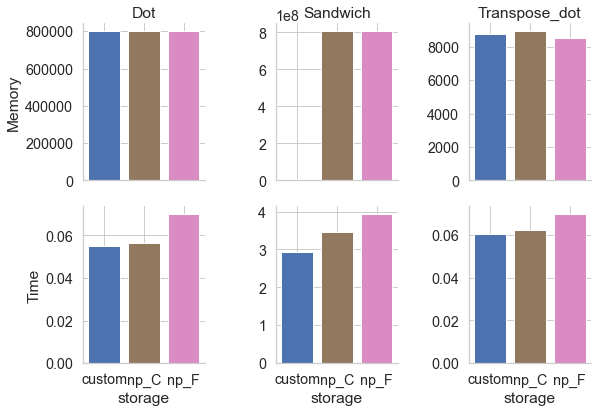

In [78]:
dense_times = pd.read_csv('dense_times.csv')
make_figure(dense_times)
plt.savefig('dense_times.png')

(2, 3)


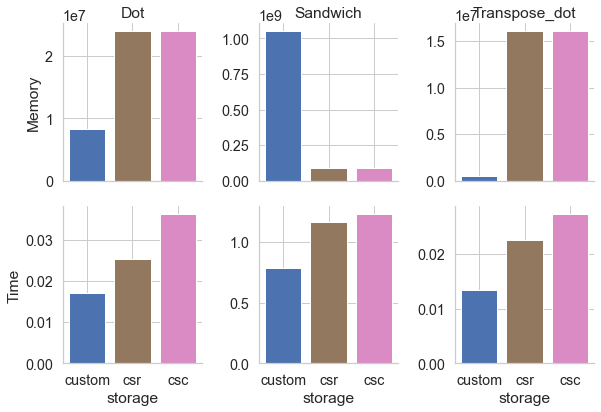

In [79]:
make_figure(two_cat_times)
plt.savefig('two_cat_times.png')

(2, 3)


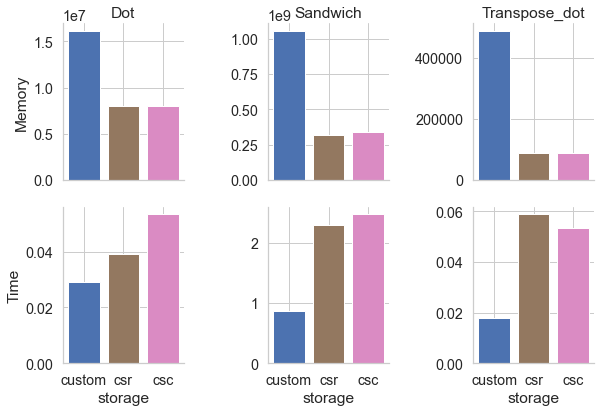

In [80]:
dense_cat_times = pd.read_csv('dense_cat_times.csv')
make_figure(dense_cat_times)
plt.savefig('dense_cat_times.png')

In [81]:
dense_times

,operation,storage,memory,time
0,dot,np_C,800536,0.056415
1,dot,np_F,800112,0.070211
2,dot,custom,801568,0.054837
3,sandwich,np_C,808003859,3.460324
4,sandwich,np_F,808000672,3.940962
5,sandwich,custom,8406661,2.935297
6,transpose_dot,np_C,8936,0.062556
7,transpose_dot,np_F,8512,0.069937
8,transpose_dot,custom,8760,0.060524
